# Teradata Data Challenge

### Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### File Paths

In [5]:
path = 'C:\\Users\\jisbsr1\\Desktop\\Personal\\School\\Spring 2020\\BAN 5763\\Teradata Project\\Data\\'

emaildatafile = 'email notification data.xlsx'
recommenddatafile = 'project_recommendations.csv'
sessiondatafile = 'session_export.xlsx'
timelinedatafile = 'timelines.csv'
userdatafile = 'users.csv'

# project data folder (3 files)
categoriesfile = 'project data\\project_categories.csv'
exportfile = 'project data\\project_export.csv'
inquiriesfile = 'project data\\project_inquiries.csv'

# user activity data folder (7 files)
datafile2014 = 'user activity data\\Analytics All Web Site Data Pages 2014.csv'
datafile2015 = 'user activity data\\Analytics All Web Site Data Pages 2015.csv'
datafile2016 = 'user activity data\\Analytics All Web Site Data Pages 2016.csv'
datafile2017 = 'user activity data\\Analytics All Web Site Data Pages 2017.csv'
datafile2018 = 'user activity data\\Analytics All Web Site Data Pages 2018.csv'
datafile2019 = 'user activity data\\Analytics All Web Site Data Pages 2019.csv'
conversionsfile = 'user activity data\\conversions.csv'

### Import Data

In [6]:
emaildata = pd.read_excel(path+emaildatafile, header=0)
recommenddata = pd.read_csv(path+recommenddatafile)
sessiondata = pd.read_excel(path+sessiondatafile)
timelinedata = pd.read_csv(path+timelinedatafile)
userdata = pd.read_csv(path+userdatafile)

categoriesdata = pd.read_csv(path+categoriesfile)
exportdata = pd.read_csv(path+exportfile)
inquiriesdata = pd.read_csv(path+inquiriesfile)

data2014 = pd.read_csv(path+datafile2014,header=0,skiprows=6)
data2015 = pd.read_csv(path+datafile2015,header=0,skiprows=6)
data2016 = pd.read_csv(path+datafile2016,header=0,skiprows=6)
data2017 = pd.read_csv(path+datafile2017,header=0,skiprows=6)
data2018 = pd.read_csv(path+datafile2018,header=0,skiprows=6)
data2019 = pd.read_csv(path+datafile2019,header=0,skiprows=6)
conversionsdata = pd.read_csv(path+conversionsfile)

C:\Users\jisbsr1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Merge

In [7]:
# User Activity Data Combine

    # modify data - remove date indexes in bottom of excel file
datalist = [data2014,data2015,data2016,data2017,data2018,data2019]
datanames = ['data2014','data2015','data2016','data2017','data2018','data2019']

# limit every dataframe to data before indicies
for i in range(len(datalist)):
    for j in range(datalist[i].shape[0]):
        # find first null row for column page
        if pd.isna(datalist[i]['Page'].iloc[j]):
            # replace variables with only the limited dataframes
            globals()[datanames[i]] =  datalist[i].iloc[0:j,:]
            break

# add year column to each dataframe
data2014['Year'] = 2014
data2015['Year'] = 2015
data2016['Year'] = 2016
data2017['Year'] = 2017
data2018['Year'] = 2018
data2019['Year'] = 2019

# create one activity dataframe
activitydata = pd.concat([data2014,data2015,data2016,data2017,data2018,data2019],ignore_index=True)

# merge timeline data to export data
export = exportdata.merge(timelinedata, how='left',left_on='timeline',right_on='value')
export.drop(columns=['value','timeline_x'],inplace=True)
export.rename(columns={'timeline_y':'timeline'},inplace=True)

# inquires merge updates
inquiries = inquiriesdata.merge(userdata,how='left',left_on='user_id',right_on='id')
inquiries.loc[inquiries['nonprofit']=='t','usertype']='nonprofit'
inquiries.loc[inquiries['consultant']=='t','usertype']='volunteer'
inquiries.drop(columns=['email_confirmed_at', 'last_sign_in_time','nonprofit', 'consultant'],inplace=True)
inquiries.drop(columns=['id_y','created_at_y'],inplace=True)
inquiries.rename(columns={'id_x':'id','created_at_x':'created_at'},inplace=True)

C:\Users\jisbsr1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jisbsr1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\jisbsr1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

### Datasets

In [ ]:
emaildata
recommenddata
sessiondata
categoriesdata
export
inquiriesdata
activitydata
conversionsdata
userdata

## What % of nonprofit and volunteers users dropoff prior to completing registration?

In [8]:
nonprofitusers=userdata[userdata['nonprofit']=='t']
volunteerusers=userdata[userdata['consultant']=='t']

percentnpdropoff = (nonprofitusers[nonprofitusers['email_confirmed_at'].isna()&nonprofitusers['last_sign_in_time'].isna()].shape[0]) / (nonprofitusers.shape[0]) * 100

percentvoldropoff = volunteerusers[volunteerusers['email_confirmed_at'].isna()&volunteerusers['last_sign_in_time'].isna()].shape[0] / volunteerusers.shape[0] * 100

print(percentnpdropoff, percentvoldropoff)

69.63948039135082 53.930633712163015


### Further Analysis

#### Define dropoff

- users who never confirmed email
- users whose last sign in was equal to email confirmation date
- users whose last sign in was equal to account created date

In [9]:
userdata_df = userdata

In [10]:
userdata_df['createtosignin']=pd.to_datetime(userdata_df['last_sign_in_time'])-pd.to_datetime(userdata_df['created_at'])

In [11]:
userdata_df['confirmtosignin']=pd.to_datetime(userdata_df['last_sign_in_time']) - pd.to_datetime(userdata_df['email_confirmed_at'])

In [12]:
userdata_df

,id,created_at,email_confirmed_at,last_sign_in_time,nonprofit,consultant,createtosignin,confirmtosignin
0,128391,2016-07-01 00:11:40.172744,NaN,2016-08-02 17:42:24.152299,f,t,32 days 17:30:43.979555,NaT
1,158619,2018-05-08 19:37:35.701007,2018-05-08 20:08:00.104919,2018-05-08 20:08:00.144328,f,t,0 days 00:30:24.443321,0 days 00:00:00.039409
2,61607,2009-12-24 18:34:33,NaN,2018-01-21 21:01:30.157411,f,t,2950 days 02:26:57.157411,NaT
3,139020,2016-12-07 18:03:31.377022,2016-12-07 18:30:42.288065,2017-10-20 20:55:53.837252,t,f,317 days 02:52:22.460230,317 days 02:25:11.549187
4,11130,2016-03-05 02:07:52.695796,2016-03-05 21:49:51.4192,2016-03-05 21:49:51.442084,t,f,0 days 19:41:58.746288,0 days 00:00:00.022884
5,15449,2005-02-16 05:00:00,NaN,NaN,f,t,NaT,NaT
6,15450,2005-03-01 05:00:00,NaN,NaN,t,f,NaT,NaT
7,15451,2005-02-17 05:00:00,NaN,NaN,f,t,NaT,NaT
8,15452,2005-02-17 05:00:00,NaN,NaN,f,t,NaT,NaT
9,15453,2016-03-31 01:36:50.606753,NaN,NaN,t,f,NaT,NaT


In [13]:
userdata_df['createtosignin']=userdata_df['createtosignin'].dt.days
userdata_df['confirmtosignin']=userdata_df['confirmtosignin'].dt.days

In [14]:
dropoff_users = userdata_df[~(userdata_df['createtosignin']>30)]
dropoff_users = dropoff_users[~(dropoff_users['confirmtosignin']>30)]

In [15]:
dropoff_users.reset_index(drop = True, inplace = True)


In [16]:
nonprofitusers_dropoff=dropoff_users[dropoff_users['nonprofit']=='t']
volunteerusers_dropoff=dropoff_users[dropoff_users['consultant']=='t']

percentnpdropoff = nonprofitusers_dropoff.shape[0] / userdata[userdata['nonprofit']=='t'].shape[0] * 100

percentvoldropoff = volunteerusers_dropoff.shape[0] / userdata[userdata['consultant']=='t'].shape[0] * 100

print(percentnpdropoff, percentvoldropoff)

88.9336512373592 88.49019824193608


In [17]:
def map_vals(x):
    if (x == 0):
        return 'Sign Up Only'
    elif (x <= 30):
        return '0-30'
    elif (x <=60):
        return '30-60'
    elif (x <= 90):
        return '60-90'
    elif (x <= 120):
        return '90-120'
    elif (x > 120):
        return '120+'
    else:
        return 'Sign Up Only'

In [18]:
userdata_df['daysactive'] = userdata_df.createtosignin.apply(lambda x: map_vals(x))

In [19]:
nonprofitdays = userdata_df[userdata_df['nonprofit']=='t']
volunteerdays = userdata_df[userdata_df['consultant']=='t']

In [20]:
plotdf = pd.DataFrame(userdata_df['daysactive'].value_counts())
plotdf['nonprofitcounts']=nonprofitdays['daysactive'].value_counts()
plotdf['volunteercounts']=volunteerdays['daysactive'].value_counts()

In [21]:
# Rearranging Index
plotdf = plotdf.loc[['Sign Up Only','0-30','30-60','60-90','90-120','120+']]

In [22]:
# Resetting Index
plotdf.reset_index(drop = False, inplace = True)
plotdf.columns = ['daysactive','usercounts','nonprofitcounts','volunteercounts']

In [23]:
plotdf

,daysactive,usercounts,nonprofitcounts,volunteercounts
0,Sign Up Only,155233,41006,114227
1,0-30,8333,2262,6071
2,30-60,2494,766,1728
3,60-90,1574,509,1065
4,90-120,1300,421,879
5,120+,15663,3688,11975


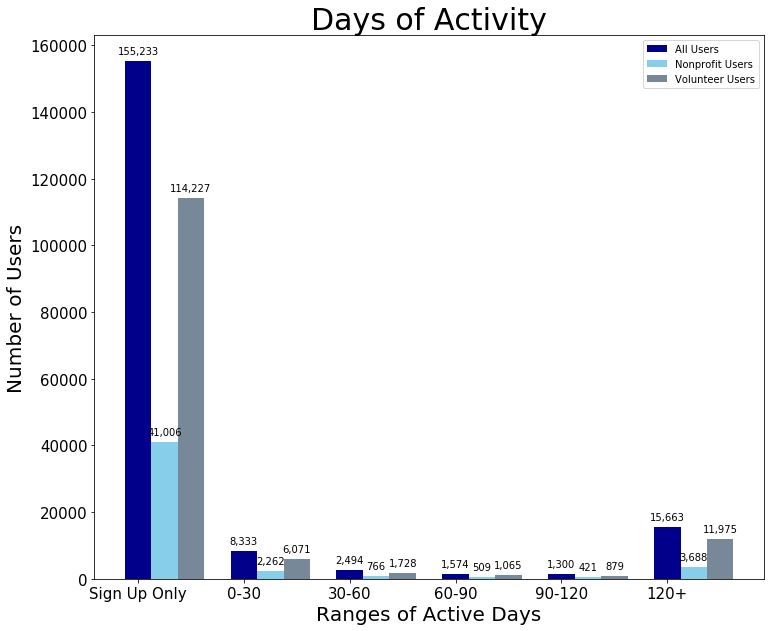

In [38]:
# setting defaults
n = plotdf.shape[0]
width = 0.25
index = np.arange(n)
xlabels = plotdf['daysactive']

# creating plot
fig, ax = plt.subplots(figsize=(12,10))
rects1 = ax.bar(index,plotdf['usercounts'],width,label='All Users',color='darkblue')
rects2 = ax.bar(index + width,plotdf['nonprofitcounts'],width, label='Nonprofit Users', color = 'skyblue')
rects3 = ax.bar(index + width + width,plotdf['volunteercounts'],width,label='Volunteer Users',color = 'lightslategrey')

# setting labels and more
ax.set_xlabel("Ranges of Active Days",fontsize=20)
ax.set_ylabel("Number of Users",fontsize=20)
ax.set_title("Days of Activity",fontsize=30)
ax.set_xticks(np.arange(n))
ax.set_xticklabels(xlabels,fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(False)
plt.legend()
add_value_labels(ax)

# show plot
plt.show()

In [37]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = '{:,.0f}'.format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [36]:
# percentage of users who never confirmed their email but used longer than 120 days
userdata_df[(userdata_df['createtosignin']>120)&(userdata_df['email_confirmed_at'].isna()==True)].shape[0]/userdata_df.shape[0] * 100

1.9079399990249029

In [35]:
# percentage of users who signed up and confirmed but nothing further
userdata_df[(userdata_df['createtosignin']==0)&(userdata_df['email_confirmed_at'].isna()==False)].shape[0] /userdata_df.shape[0] * 100

12.874532088820512

In [46]:
plotdf[plotdf['daysactive']=='120+']['usercounts'] / userdata_df.shape[0]*100

5    8.48497
Name: usercounts, dtype: float64

## How many nonprofits are conducting sessions on the same or related subject?

### Text Analysis

In [82]:
sessiondata.head()

,id,created_at,updated_at,state,description,consultant_id,nonprofit_id,scheduled_for,time_slots,organization_id,conference_line_id,project_category_id,partner_organization_id,archived,description_processed
0,102,2017-01-10 19:04:55.571,2017-01-10 19:05:13.720,cancelled,test.,NaN,2036,NaT,"{""2017-01-13 16:00:00"",""2017-01-13 18:00:00"",""...",239,NaN,20.0,NaN,f,test
1,110,2017-03-29 14:36:50.901,2017-03-31 18:00:00.402,completed,We're creating new websites for a couple of ou...,130022.0,144136,2017-03-31 16:00:00,"{""2017-03-29 20:00:00"",""2017-03-30 20:00:00"",""...",4218,5.0,20.0,NaN,f,we re creating new websites for a couple of ou...
2,60,2016-03-17 16:08:47.427,2016-03-30 14:52:12.539,cancelled,The TASH website is a Wordpress website that w...,11865.0,11682,2016-03-31 19:00:00,"{""2016-03-28 15:00:00"",""2016-03-28 20:00:00"",""...",2153,1.0,20.0,NaN,f,the tash website is a wordpress website that w...
3,95,2016-08-24 19:37:31.044,2016-09-06 15:00:01.829,completed,We want to increase our online sales of tea an...,129767.0,131196,2016-09-06 13:00:00,"{""2016-08-30 14:00:00"",""2016-08-30 15:00:00"",""...",2933,2.0,10.0,NaN,f,we want to increase our online sales of tea an...
4,53,2016-03-17 00:05:42.531,2016-03-24 16:00:01.854,completed,We are currently in the process of redesigning...,11412.0,9367,2016-03-24 14:00:00,"{""2016-03-23 15:00:00"",""2016-03-24 14:00:00"",""...",1370,1.0,20.0,NaN,f,we are currently in the process of redesigning...


In [42]:
df = sessiondata.drop(columns=['id','created_at','updated_at','state','consultant_id','scheduled_for','time_slots','organization_id','conference_line_id'])

In [43]:
df.head()

,description,nonprofit_id,project_category_id,partner_organization_id,archived
0,test.,2036,20.0,NaN,f
1,We're creating new websites for a couple of ou...,144136,20.0,NaN,f
2,The TASH website is a Wordpress website that w...,11682,20.0,NaN,f
3,We want to increase our online sales of tea an...,131196,10.0,NaN,f
4,We are currently in the process of redesigning...,9367,20.0,NaN,f


In [50]:
df = df.merge(categoriesdata,how='left',left_on='project_category_id',right_on='id')

In [55]:
df = df.drop(columns=['partner_organization_id','archived','id','created_at','updated_at','group_slug','enabled','international','slug','project_category_id'])

In [80]:
groupby_df = df[['nonprofit_id','name']].groupby(['name']).nunique()
groupby_df.drop(['name'],axis = 1,inplace = True)
groupby_df.sort_values(['nonprofit_id'], ascending = False, inplace = True)
groupby_df.reset_index(drop = False,inplace = True)
groupby_df.columns = ['name','unique_count']

In [81]:
groupby_df

,name,unique_count
0,Marketing Strategy,245
1,Business Planning,153
2,Accounting & Finance,139
3,Brand Development,101
4,Website development,101
5,Board Development,71
6,IT Infrastructure,64
7,Website design,59
8,HR Management,42
9,CRM,41


### Topic Modeling

source: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [16]:
# Load the regular expression library
import re
# Remove punctuation
sessiondata['description_processed'] = sessiondata['description'].apply(str).map(lambda x: re.sub('[^a-zA-Z]', ' ', x))
# Convert the titles to lowercase
sessiondata['description_processed'] = sessiondata['description_processed'].map(lambda x: x.lower())
# Remove certain words (need, help, plan)
banned = ['need','help','plan','like']
words = lambda x: ' '.join([item for item in x.split() if item not in banned])
sessiondata['description_processed'] = sessiondata['description_processed'].apply(words)
# Print out the first rows of papers
sessiondata['description_processed'].head()



0                                                 test
1    we re creating new websites for a couple of ou...
2    the tash website is a wordpress website that w...
3    we want to increase our online sales of tea an...
4    we are currently in the process of redesigning...
Name: description_processed, dtype: object

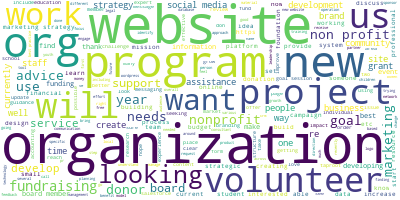

In [17]:

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(sessiondata['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

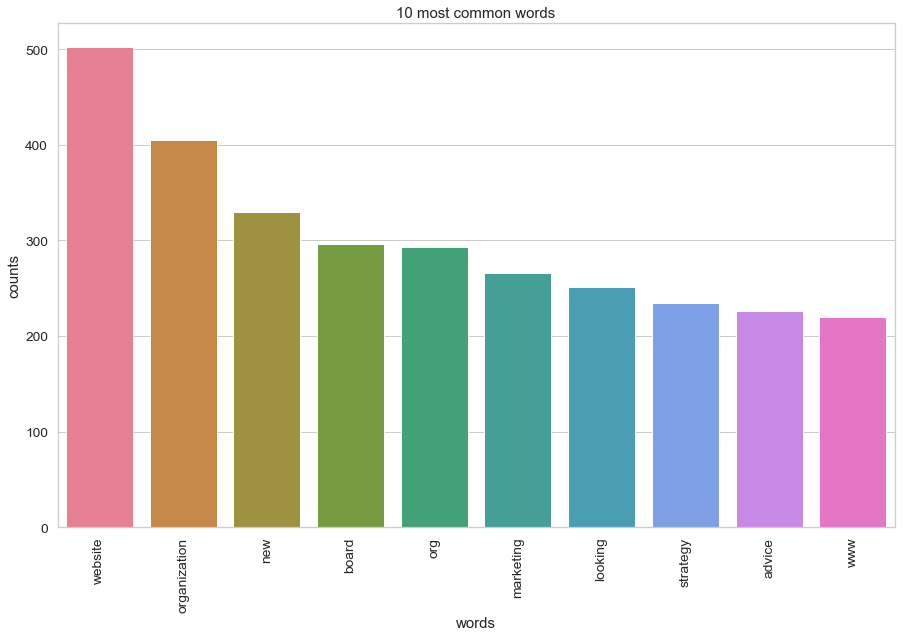

In [18]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(sessiondata['description_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [20]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 5
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
new org organization board best program looking www development website

Topic #1:
marketing strategy media website data salesforce social public com goal

Topic #2:
website organization org new development marketing project staff board want

Topic #3:
nonprofit website advice organization use accounting goal fundraising non profit

Topic #4:
organization board looking members strategy funding develop want advice goal


### Analysis of Marketing Project Category

In [119]:
# Load the regular expression library
import re
# Remove punctuation
df['description_processed'] = df['description'].apply(str).map(lambda x: re.sub('[^a-zA-Z]', ' ', x))
# Convert the titles to lowercase
df['description_processed'] = df['description_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df['description_processed'].head()
marketing = df[df['name']=='Marketing Strategy']

In [120]:
marketing.head()

,description,nonprofit_id,name,description_processed
3,We want to increase our online sales of tea an...,131196,Marketing Strategy,we want to increase our online sales of tea an...
5,Our most important customers are buyers of cor...,131204,Marketing Strategy,our most important customers are buyers of cor...
14,Look at hjow to market what we do in order to ...,170762,Marketing Strategy,look at hjow to market what we do in order to ...
18,We have been using email and social media to r...,154006,Marketing Strategy,we have been using email and social media to r...
20,We are struggling to grow our online sales. We...,131196,Marketing Strategy,we are struggling to grow our online sales we...


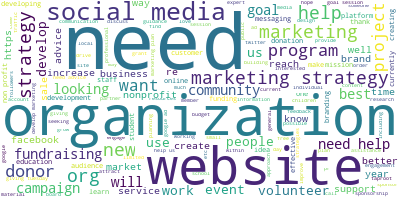

In [121]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(marketing['description_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

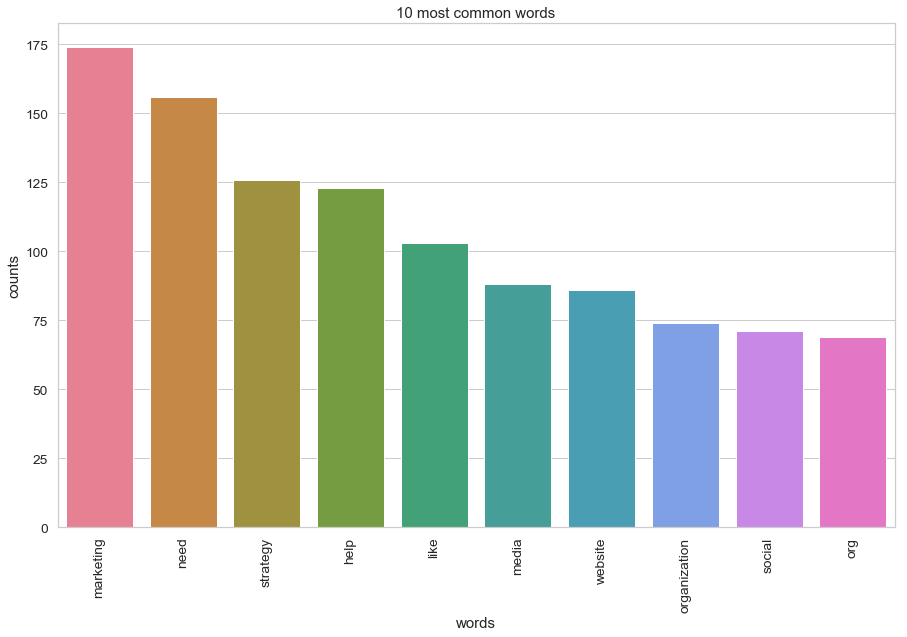

In [122]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(marketing['description_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [124]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
marketing media help strategy need social like org looking website

Topic #1:
help need marketing want org developing website strategy year organization

Topic #2:
need marketing organization strategy program develop youth programs new services

Topic #3:
marketing like help strategy website nonprofit work profit https new

Topic #4:
need like strategy marketing website looking media help organization want


In [26]:
export.head

,id,organization_id,description,created_at,updated_at,state,user_id,needs_accomplish,needs_support,needs_value,...,success_story,partner_organization_id,match_job_id,satisfaction_rating,agreed_at_community,publish_externally,enable_success_story,is_archived,share_metadata,timeline
0,5948,4809,Website design optimization for new brand,2017-07-06 17:27:44.905846,2017-08-30 01:39:47.519662,closed,148960,We are looking for a web designer who can assi...,Shaw is the most rapidly gentrifying zip code ...,We have a marketing & branding expert who has ...,...,NaN,NaN,NaN,NaN,2017-07-06 17:54:28.281227,t,f,f,"{""project_id"": null}",6 - 9 weeks
1,5908,2051,New logo design,2017-06-28 16:55:47.85256,2017-11-11 18:17:38.379281,completed,122660,We are looking for a new Visual identity (logo...,We are a 25+ year organization that could use ...,The time is NOW since we have concluded a bran...,...,NaN,NaN,NaN,NaN,2016-04-14 21:25:00.799927,t,f,f,"{""project_id"": null}",6 - 9 weeks
2,9339,1401,NaN,2019-01-15 00:00:34.636008,2019-01-15 00:00:34.636008,draft,169620,Our brochure needs revision and slight redesig...,We are opening two new clinics this year and o...,Our existing brochure is already in English an...,...,NaN,NaN,NaN,NaN,NaN,t,f,f,"{""project_id"": null}",6 - 9 weeks
3,5975,4831,LOI and grant application,2017-07-10 15:36:19.184276,2017-09-27 13:39:17.766539,closed,149358,We are looking for a grant writer to assist us...,NARP has been around since the late 1960s and ...,We have identified our target grantor and have...,...,NaN,NaN,NaN,NaN,2017-07-26 16:09:05.920907,t,f,f,"{""project_id"": null}",6 - 9 weeks
4,9981,7860,NaN,2019-04-03 03:19:57.84851,2019-04-03 03:19:57.84851,draft,172963,Organizing books and prepare tax documents. We...,Optimistic Movement was founded in June 2017. ...,We have purchased Quickbooks. Most of expenses...,...,NaN,NaN,NaN,NaN,NaN,t,f,f,"{""project_id"": null}",1 - 3 weeks


In [28]:
export.columns

Index(['id', 'organization_id', 'description', 'created_at', 'updated_at',
       'state', 'user_id', 'needs_accomplish', 'needs_support', 'needs_value',
       'campaign_id', 'image_id', 'project_inquiries_count', 'admin_id',
       'project_group', 'project_category_id', 'local_only', 'success_story',
       'partner_organization_id', 'match_job_id', 'satisfaction_rating',
       'agreed_at_community', 'publish_externally', 'enable_success_story',
       'is_archived', 'share_metadata', 'timeline'],
      dtype='object')

In [29]:
sessiondata.columns

Index(['id', 'created_at', 'updated_at', 'state', 'description',
       'consultant_id', 'nonprofit_id', 'scheduled_for', 'time_slots',
       'organization_id', 'conference_line_id', 'project_category_id',
       'partner_organization_id', 'archived', 'description_processed'],
      dtype='object')

In [30]:
userdata.columns

Index(['id', 'created_at', 'email_confirmed_at', 'last_sign_in_time',
       'nonprofit', 'consultant'],
      dtype='object')

In [31]:
nonprofitusers.head()

,id,created_at,email_confirmed_at,last_sign_in_time,nonprofit,consultant
3,139020,2016-12-07 18:03:31.377022,2016-12-07 18:30:42.288065,2017-10-20 20:55:53.837252,t,f
4,11130,2016-03-05 02:07:52.695796,2016-03-05 21:49:51.4192,2016-03-05 21:49:51.442084,t,f
6,15450,2005-03-01 05:00:00,NaN,NaN,t,f
9,15453,2016-03-31 01:36:50.606753,NaN,NaN,t,f
12,151715,2017-09-20 17:53:28.915555,2017-09-25 18:53:10.400682,2017-09-25 18:53:10.430242,t,f


In [34]:
test = export.merge(sessiondata,how='left',left_on='user_id',right_on='nonprofit_id')

In [35]:
test

,id_x,organization_id_x,description_x,created_at_x,updated_at_x,state_x,user_id,needs_accomplish,needs_support,needs_value,...,consultant_id,nonprofit_id,scheduled_for,time_slots,organization_id_y,conference_line_id,project_category_id_y,partner_organization_id_y,archived,description_processed
0,5948,4809,Website design optimization for new brand,2017-07-06 17:27:44.905846,2017-08-30 01:39:47.519662,closed,148960,We are looking for a web designer who can assi...,Shaw is the most rapidly gentrifying zip code ...,We have a marketing & branding expert who has ...,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5908,2051,New logo design,2017-06-28 16:55:47.85256,2017-11-11 18:17:38.379281,completed,122660,We are looking for a new Visual identity (logo...,We are a 25+ year organization that could use ...,The time is NOW since we have concluded a bran...,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9339,1401,NaN,2019-01-15 00:00:34.636008,2019-01-15 00:00:34.636008,draft,169620,Our brochure needs revision and slight redesig...,We are opening two new clinics this year and o...,Our existing brochure is already in English an...,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5975,4831,LOI and grant application,2017-07-10 15:36:19.184276,2017-09-27 13:39:17.766539,closed,149358,We are looking for a grant writer to assist us...,NARP has been around since the late 1960s and ...,We have identified our target grantor and have...,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9981,7860,NaN,2019-04-03 03:19:57.84851,2019-04-03 03:19:57.84851,draft,172963,Organizing books and prepare tax documents. We...,Optimistic Movement was founded in June 2017. ...,We have purchased Quickbooks. Most of expenses...,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2646,515,Innovative marketing strategies for focused ca...,2016-04-12 17:27:07.249413,2016-10-31 17:44:05.193653,completed,3089,We are new to fundraising and need help planni...,We would like advice on selling merchandise on...,"With a successful completion of this project, ...",...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5803,4712,Design for outreach package,2017-06-14 22:13:48.016384,2017-08-04 19:43:00.130773,closed,148330,Bangtail - Brochure + remit envelope with copy...,Our yearly outreach is generally a letter and ...,"We will provide detailed copy, images and a de...",...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5367,4343,Public relations for special event,2017-04-12 16:24:51.181924,2017-09-22 11:43:53.799919,closed,145375,We are looking to work with someone who can he...,"This fall, we are hosting a building dedicatio...",We are a small but mighty Communications Team ...,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5905,4305,Logo and brand design for special event,2017-06-28 14:18:17.774979,2017-07-27 20:47:37.285743,closed,144980,"In September, Unity Health Care will host its ...",This signature event helps raise necessary don...,"In preparation for this project, we have outli...",...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2556,1921,NaN,2016-04-06 18:20:37.719807,2016-04-10 23:25:34.242759,rejected,109940,NaN,NaN,NaN,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
testdata = test[test['state_x']=='applied']

In [44]:
sessiondata.columns

Index(['id', 'created_at', 'updated_at', 'state', 'description',
       'consultant_id', 'nonprofit_id', 'scheduled_for', 'time_slots',
       'organization_id', 'conference_line_id', 'project_category_id',
       'partner_organization_id', 'archived', 'description_processed'],
      dtype='object')

In [40]:
sessiondata['state'].unique()

array(['cancelled', 'completed', 'expired', 'draft', 'pending', 'applied',
       'npo_rescheduled', 'pbc_rescheduled', 'missed', 'published',
       'matched'], dtype=object)

In [52]:
validstates = ['draft','pending','applied']
exportbeforecom = export[export['state'].isin(validstates)]

In [56]:
exportbeforecom = exportbeforecom[['id','created_at','state','user_id']]
sessioncombine = sessiondata[['id','nonprofit_id','created_at','state','scheduled_for']]

In [57]:
df = exportbeforecom.merge(sessioncombine,how='left',left_on='user_id',right_on='nonprofit_id')

In [62]:
invalid_states = ['expired','cancelled']
df = df[~df['state_y'].isna()]

df = df[~df['state_y'].isin(invalid_states)]

In [67]:
df.groupby('id_x')['id_y'].nunique()

id_x
6725     1
6726     1
7312     1
7726     1
7998     1
8466     1
8865     1
9162     1
9287     1
9288     1
9317     1
10130    1
10131    1
10204    1
10399    1
10576    3
10664    1
11188    1
11445    1
11612    1
Name: id_y, dtype: int64

In [66]:
df[df['id_y']==342]

,id_x,created_at_x,state_x,user_id,id_y,nonprofit_id,created_at_y,state_y,scheduled_for
108,9287,2019-01-08 01:20:22.646398,applied,155485,342.0,155485.0,2018-02-17 23:22:00.164,completed,2018-03-05 17:00:00
109,9288,2019-01-08 01:20:38.949864,draft,155485,342.0,155485.0,2018-02-17 23:22:00.164,completed,2018-03-05 17:00:00


In [68]:
userdata

,id,created_at,email_confirmed_at,last_sign_in_time,nonprofit,consultant
0,128391,2016-07-01 00:11:40.172744,NaN,2016-08-02 17:42:24.152299,f,t
1,158619,2018-05-08 19:37:35.701007,2018-05-08 20:08:00.104919,2018-05-08 20:08:00.144328,f,t
2,61607,2009-12-24 18:34:33,NaN,2018-01-21 21:01:30.157411,f,t
3,139020,2016-12-07 18:03:31.377022,2016-12-07 18:30:42.288065,2017-10-20 20:55:53.837252,t,f
4,11130,2016-03-05 02:07:52.695796,2016-03-05 21:49:51.4192,2016-03-05 21:49:51.442084,t,f
5,15449,2005-02-16 05:00:00,NaN,NaN,f,t
6,15450,2005-03-01 05:00:00,NaN,NaN,t,f
7,15451,2005-02-17 05:00:00,NaN,NaN,f,t
8,15452,2005-02-17 05:00:00,NaN,NaN,f,t
9,15453,2016-03-31 01:36:50.606753,NaN,NaN,t,f
